In [1]:
import pandas as pd

In [2]:
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()

In [3]:
from plotly import graph_objs as go
from plotly import tools as tls

In [4]:
btc = pd.read_csv('data/pos_neg/posneg_stck_btc_decl.csv', index_col=0)
eth = pd.read_csv('data/pos_neg/posneg_stck_eth_decl.csv', index_col=0)
aapl = pd.read_csv('data/pos_neg/posneg_stck_aapl_decl.csv', index_col=0)
spx = pd.read_csv('data/pos_neg/posneg_stck_spx_decl.csv', index_col=0)

In [5]:
btc_si = pd.DataFrame((btc.pos - btc.neg) / (btc.pos + btc.neg))
btc_si.index = pd.to_datetime(btc.index)
btc_mon = btc_si.groupby(btc_si.index.weekday).mean()
btc_mon.index = ['pon.', 'wt.', 'śr.', 'czw.', 'pt.', 'sob.', 'nd.']
btc_mon

,0
pon.,0.390066
wt.,0.438810
śr.,0.465568
czw.,0.409130
pt.,0.481281
sob.,0.460717
nd.,0.431538


In [6]:
eth_si = pd.DataFrame((eth.pos - eth.neg) / (eth.pos + eth.neg))
eth_si.index = pd.to_datetime(eth.index)
eth_mon = eth_si.groupby(eth_si.index.weekday).mean()
eth_mon.index = ['pon.', 'wt.', 'śr.', 'czw.', 'pt.', 'sob.', 'nd.']
eth_mon

,0
pon.,0.446496
wt.,0.493162
śr.,0.501115
czw.,0.463947
pt.,0.565795
sob.,0.558819
nd.,0.515565


In [7]:
aapl_si = pd.DataFrame((aapl.pos - aapl.neg) / (aapl.pos + aapl.neg))
aapl_si.index = pd.to_datetime(aapl.index)
aapl_mon = aapl_si.groupby(aapl_si.index.weekday).mean()
aapl_mon.index = ['pon.', 'wt.', 'śr.', 'czw.', 'pt.']
aapl_mon

,0
pon.,0.319612
wt.,0.371785
śr.,0.353282
czw.,0.343646
pt.,0.326451


In [8]:
spx_si = pd.DataFrame((spx.pos - spx.neg) / (spx.pos + spx.neg))
spx_si.index = pd.to_datetime(spx.index)
spx_mon = spx_si.groupby(spx_si.index.weekday).mean()
spx_mon.index = ['pon.', 'wt.', 'śr.', 'czw.', 'pt.']
spx_mon

,0
pon.,0.072622
wt.,0.065890
śr.,0.024872
czw.,0.059273
pt.,0.046759


In [9]:
fig = tls.make_subplots(rows=2, cols=2, subplot_titles=['<b>BTC</b>', '<b>ETH</b>', '<b>AAPL</b>', '<b>SPX</b>'])

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [10]:
t1 = go.Bar(x=btc_mon.index, y=btc_mon[0], marker_color='rgb(0,0,0)', text=btc_mon[0].round(2), textposition='outside')
t2 = go.Bar(x=eth_mon.index, y=eth_mon[0], marker_color='rgb(0,0,0)', text=eth_mon[0].round(2), textposition='outside')
t3 = go.Bar(x=aapl_mon.index, y=aapl_mon[0], marker_color='rgb(0,0,0)', text=aapl_mon[0].round(2), textposition='outside')
t4 = go.Bar(x=spx_mon.index, y=spx_mon[0], marker_color='rgb(0,0,0)', text=spx_mon[0].round(3), textposition='outside')

In [11]:
fig.append_trace(t1, 1, 1)
fig.append_trace(t2, 1, 2)
fig.append_trace(t3, 2, 1)
fig.append_trace(t4, 2, 2)

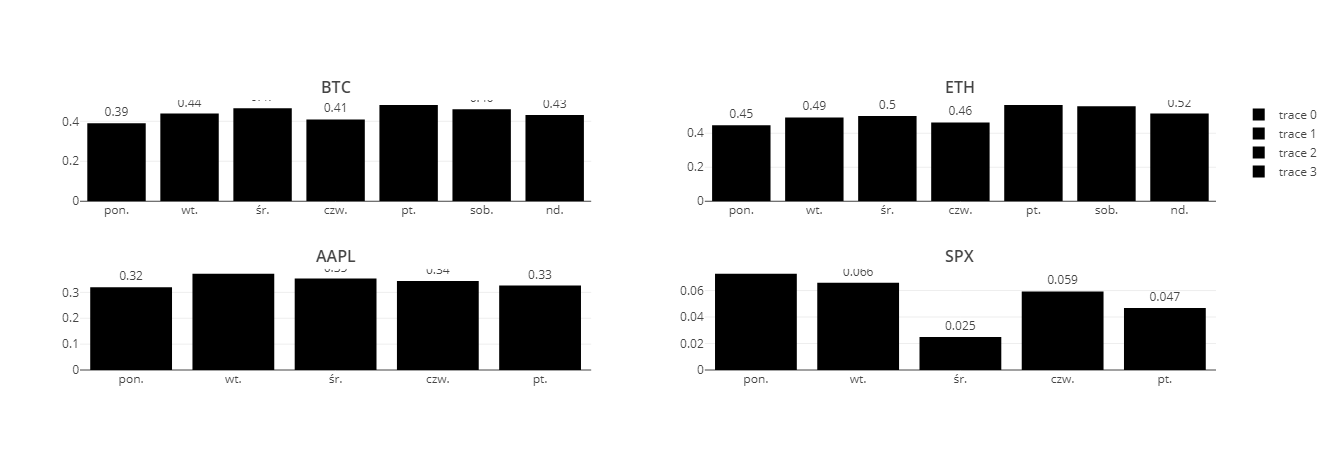

In [12]:
iplot(fig)